# Lecture 4: Advanced regression models

On the previous lecture we have familiarised ourself with the basic linear regression model:

### Regression line equation:
Linear regression describes the relationship between the dependent variable (y) and the independent variable (x) using the equation:

$$
y = \beta_0 + \beta_1 x
$$


<IPython.core.display.Javascript object>


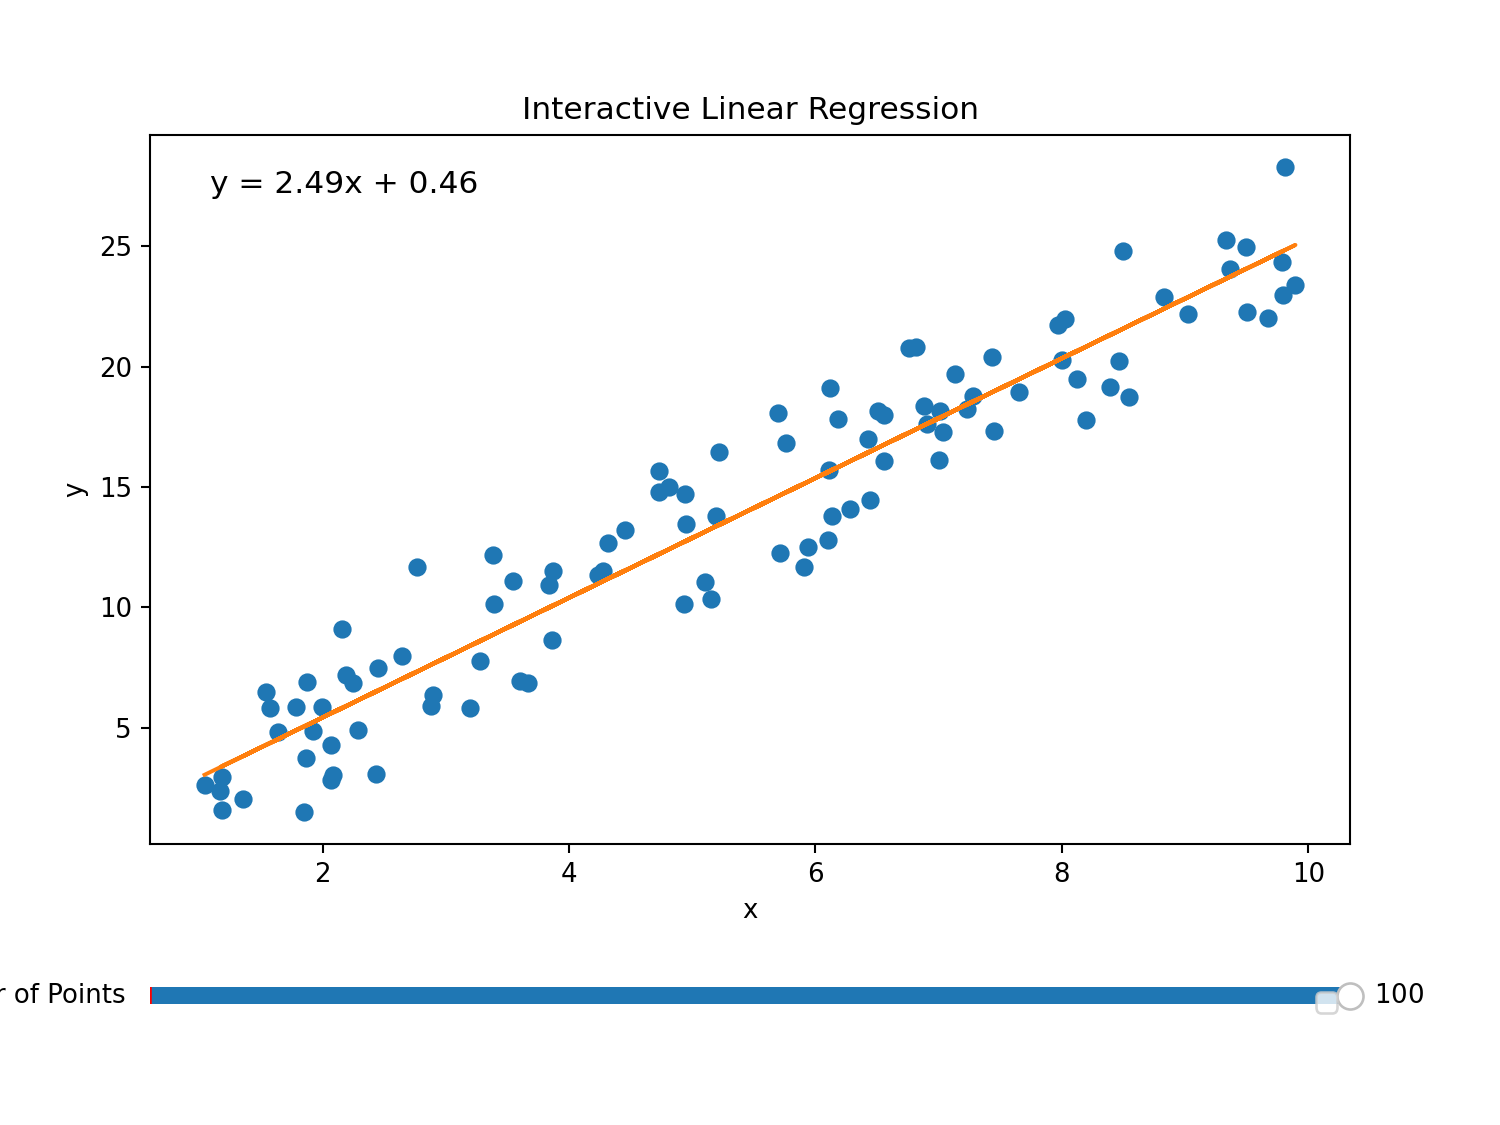

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from sklearn.linear_model import LinearRegression

# Enable interactive mode
%matplotlib notebook

# Generating initial data
np.random.seed(0)
x_full = np.random.uniform(1, 10, 100)
y_full = 2.5 * x_full + np.random.normal(0, 2, 100)

# Linear regression model
def fit_regression(x, y):
    model = LinearRegression()
    x_reshaped = x.reshape(-1, 1)  # Reshaping for sklearn
    model.fit(x_reshaped, y)
    y_pred = model.predict(x_reshaped)
    return y_pred, model.coef_[0], model.intercept_

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)

# Plot the initial subset of points and regression line
line_data, = plt.plot(x_full, y_full, 'o', label='Data points')
y_pred, slope, intercept = fit_regression(x_full, y_full)
line_regression, = plt.plot(x_full, y_pred, label='Regression Line')

# Display the regression equation
text_eq = ax.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}', 
                  transform=ax.transAxes, fontsize=12, verticalalignment='top')

plt.title("Interactive Linear Regression")
plt.xlabel("x")
plt.ylabel("y")

# Add a slider for adjusting the number of data points
ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgoldenrodyellow')
points_slider = Slider(ax_slider, 'Number of Points', 2, 100, valinit=2, valstep=1)

# Update function for the slider
def update(val):
    num_points = int(points_slider.val)
    x_subset = x_full[:num_points]
    y_subset = y_full[:num_points]
    
    # Update data points and regression line
    line_data.set_data(x_subset, y_subset)
    y_pred, slope, intercept = fit_regression(x_subset, y_subset)
    line_regression.set_data(x_subset, y_pred)
    
    # Update the displayed regression equation
    text_eq.set_text(f'y = {slope:.2f}x + {intercept:.2f}')
    
    ax.relim()
#     ax.autoscale_view()
    fig.canvas.draw_idle()

# Call the update function when the slider value changes
points_slider.on_changed(update)

# Display the plot
plt.legend()
plt.show()


We also talked about how models "learn" through Stochastic Gradient Descent

C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


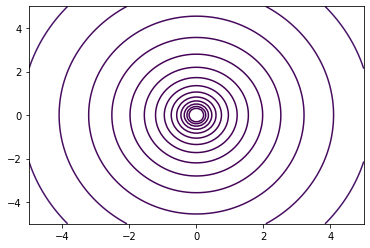

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Define the function (a simple quadratic bowl for this example)
def f(x, y):
    return 2*x**2 + y**2

# Gradient of the function
def grad_f(x, y):
    return np.array([4*x, 2*y])

# Stochastic Gradient Descent (SGD) with adjustable learning rate and iterations
def sgd(starting_point, learning_rate, iterations):
    x_values = [starting_point[0]]
    y_values = [starting_point[1]]
    current_point = np.array(starting_point)
    
    for i in range(iterations):
        gradient = grad_f(current_point[0], current_point[1])
        current_point = current_point - learning_rate * gradient
        x_values.append(current_point[0])
        y_values.append(current_point[1])
    
    return x_values, y_values

# Create a grid for the contour plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Set up the figure and axis
fig, ax = plt.subplots()
ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')

# Starting point and parameters for SGD
start_point = np.array([4, 4])
learning_rate = 0.1

# This function will update the plot for the animation
def update(iteration):
    ax.clear()
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    iterations = iteration + 1
    x_vals, y_vals = sgd(start_point, learning_rate, iterations)
    ax.plot(x_vals, y_vals, marker='o', color='red')
    ax.set_title(f"SGD Iteration: {iterations}")

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=50, interval=200)

# Show the plot
plt.show()


## Real-life applications of regression

### Example 1: Housing Prices Prediction

*Scenario*: Imagine you’re looking to buy a house. One of the main questions you might have is, “What’s the fair price for a house in this area?”

*Regression in Action*: A regression model can help predict house prices based on various features, like:

    Square footage: Larger houses tend to cost more.
    Number of bedrooms: More rooms usually add to the price.
    Location: Houses in prime locations generally have higher prices.

*Why It Matters*: Real estate companies use these predictions to set fair prices. Buyers can understand if they’re getting a good deal, and sellers know what price to expect.

### Example 2: Weather Forecasting 

*Scenario*: We all rely on weather forecasts for planning activities like trips, outdoor events, or even just deciding what to wear.

*Regression in Action*: Regression models use historical weather data and factors like:

    Temperature patterns over previous days: Is there a trend that temperatures are rising or falling?
    Humidity levels: High humidity can mean rain.
    Seasonal data: Certain seasons have predictable weather patterns.

*Why It Matters*: Regression models can provide day-to-day or even week-long forecasts, helping people and businesses prepare. Farmers, for example, depend on these models to know the best time for planting and harvesting.


### Example 3: Social Media and Trend Analysis

*Scenario*: Think about your favorite social media platforms. Ever wonder how they predict what content will go viral?

*Regression in Action*: Social media platforms use regression to predict engagement (likes, comments, shares) based on:

        Content type: Videos might perform better than photos.
        Post frequency: Posting too often or too little affects engagement.
        Follower demographics: Certain age groups may engage more with certain types of content.
        
*Why It Matters*: Brands and influencers can use this data to optimize their strategies, ensuring that they reach and engage their audience effectively.

### Example 4: Healthcare and Patient Outcomes

*Scenario*: Imagine a doctor trying to predict a patient’s recovery time based on past cases.

*Regression in Action*: Healthcare providers use regression to estimate outcomes, considering:

        Age: Older patients might have different recovery times.
        Existing conditions: Health factors can influence outcomes.
        Treatment type: Different treatments may lead to faster or slower recovery.
        
*Why It Matters*: Predicting patient outcomes helps doctors make informed decisions, allocate resources, and provide personalized care plans.

In [7]:
data

,Age,PreExistingCondition,TreatmentType,RecoveryTime
0,58,1,0,47.928378
1,71,0,0,62.054029
2,48,1,0,47.639166
3,34,0,1,28.904653
4,62,1,0,52.780799
...,...,...,...,...
95,33,1,1,23.838585
96,50,0,1,32.242830
97,67,0,1,45.947534
98,34,0,0,43.335244


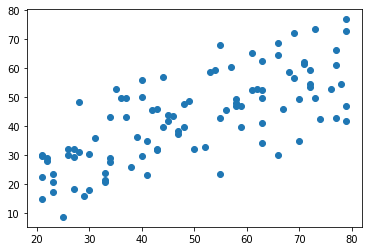

In [15]:

plt.scatter(data['Age'],data['RecoveryTime'])
plt.show()

Data gathered from the medical examination


,Age,PreExistingCondition,TreatmentType,RecoveryTime
0,58,1,0,47.928378
1,71,0,0,62.054029
2,48,1,0,47.639166
3,34,0,1,28.904653
4,62,1,0,52.780799


Recovery Time vs Age


<IPython.core.display.Javascript object>


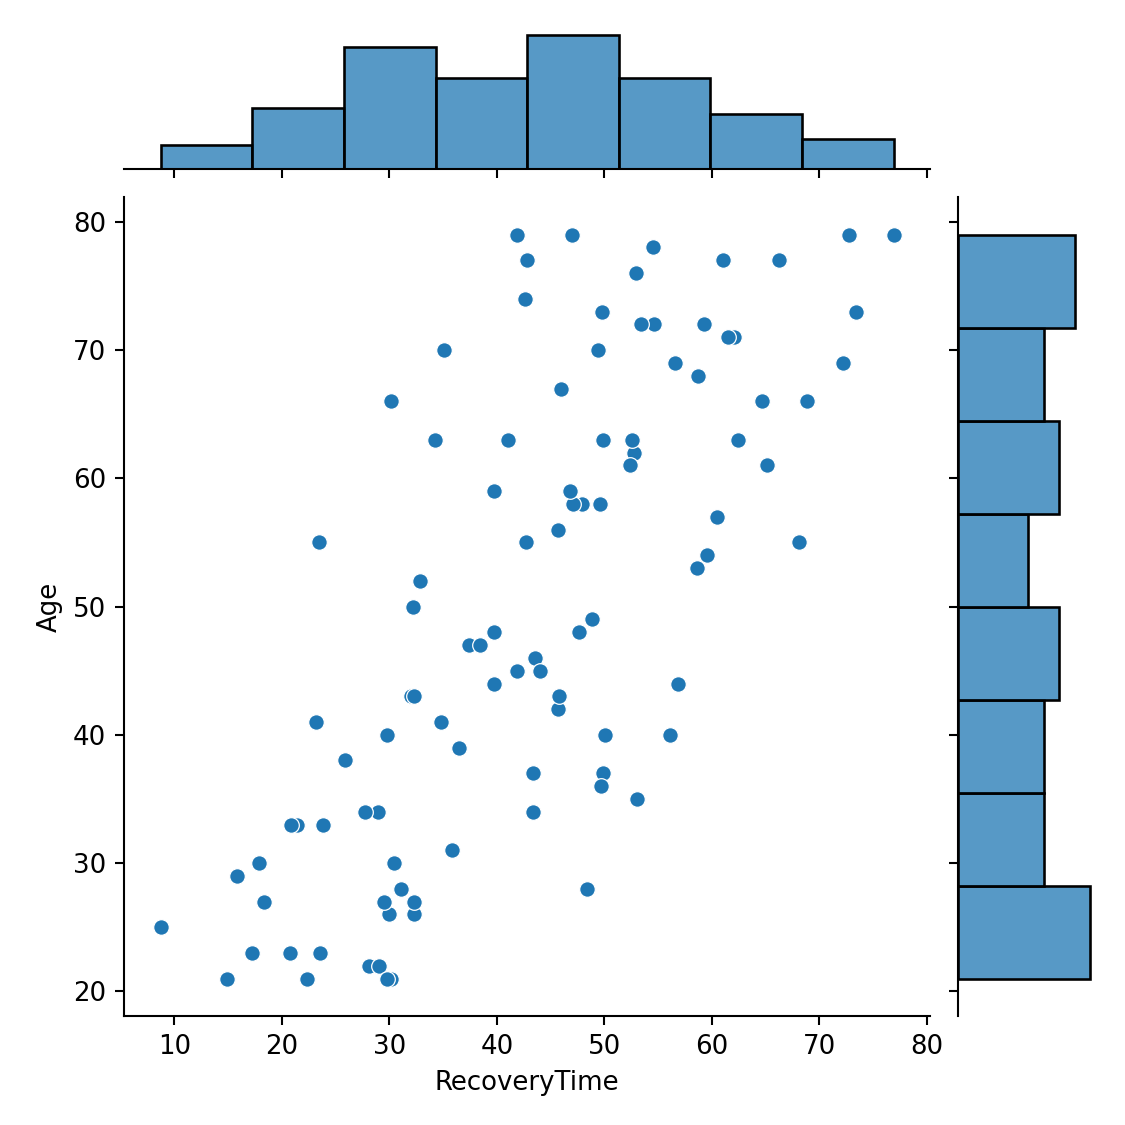

Recovery Time vs TreatmentType


<IPython.core.display.Javascript object>


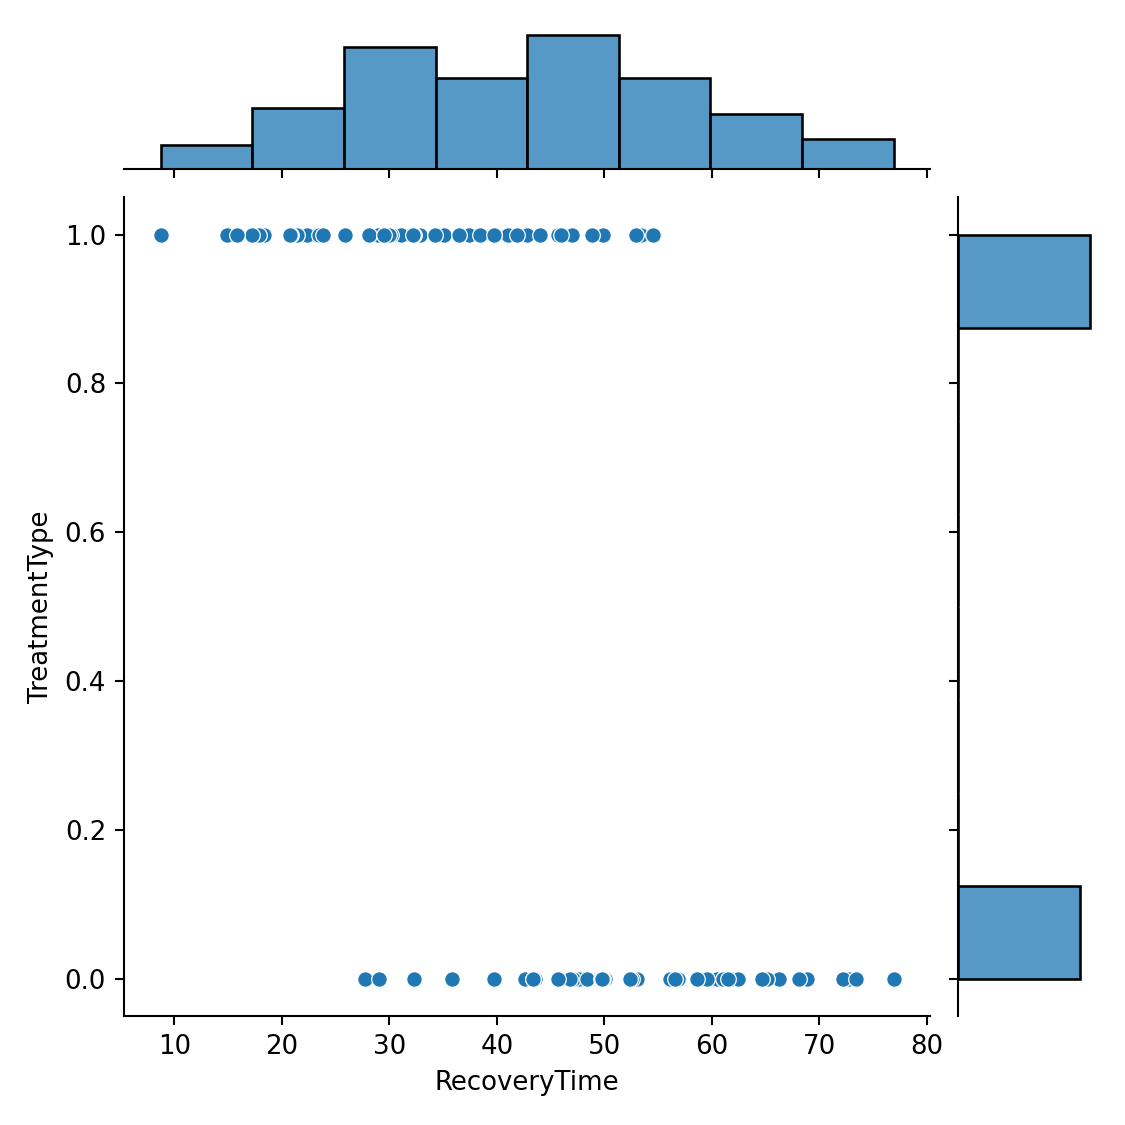

Mean Squared Error (MSE): 19.87
R² Score: 0.92


interactive(children=(IntSlider(value=50, description='Age:', max=80, min=20), Dropdown(description='Pre-Exist…

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from IPython.display import display

# Generate synthetic data for the example
np.random.seed(42)
n_samples = 100

# Features
age = np.random.randint(20, 80, n_samples)  # Age of patients
pre_existing_condition = np.random.choice([0, 1], n_samples)  # 0 for No, 1 for Yes
treatment_type = np.random.choice([0, 1], n_samples)  # 0 for Basic, 1 for Advanced

# Target: Simulated recovery time (in days)
recovery_time = (
    30 + 0.5 * age - 10 * pre_existing_condition - 15 * treatment_type
    + np.random.normal(0, 5, n_samples)
)

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'PreExistingCondition': pre_existing_condition,
    'TreatmentType': treatment_type,
    'RecoveryTime': recovery_time
})

# Display the first few rows of data
print("Data gathered from the medical examination")
display(data.head())

print("Recovery Time vs Age")
sns.jointplot(data=data,x='RecoveryTime',y='Age')

print("Recovery Time vs TreatmentType")
sns.jointplot(data=data,x='RecoveryTime',y='TreatmentType')

# Split data into features (X) and target (y)
X = data[['Age', 'PreExistingCondition', 'TreatmentType']]
y = data['RecoveryTime']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict recovery time on the test set
y_pred = model.predict(X_test)

# Calculate and print model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Interactive widget to make predictions
def predict_recovery_time(age, pre_existing_condition, treatment_type):
    features = np.array([[age, pre_existing_condition, treatment_type]])
    prediction = model.predict(features)[0]
    print(f"Predicted Recovery Time: {prediction:.2f} days")

# Creating interactive widgets
age_widget = widgets.IntSlider(value=50, min=20, max=80, step=1, description='Age:')
pre_existing_condition_widget = widgets.Dropdown(
    options=[('No', 0), ('Yes', 1)],
    value=0,
    description='Pre-Existing Condition:',
    style={'description_width': 'initial'}
)
treatment_type_widget = widgets.Dropdown(
    options=[('Basic', 0), ('Advanced', 1)],
    value=0,
    description='Treatment Type:',
    style={'description_width': 'initial'}
)

# Display interactive widgets
# display(age_widget, pre_existing_condition_widget, treatment_type_widget)

# Interactive function call
widgets.interactive(predict_recovery_time, 
                    age=age_widget,
                    pre_existing_condition=pre_existing_condition_widget,
                    treatment_type=treatment_type_widget)


## What else do you think could be an example of regression?

## Outliers and How They Impact Regression?

Outliers are data points that deviate significantly from the overall pattern of the data. In regression, they are particularly impactful because they can distort the line of best fit, potentially leading to inaccurate predictions and interpretations.

What is an Outlier?

Definition: An outlier is an observation that lies far outside the typical range of values in the dataset. Imagine you’re studying daily temperatures, and most days fall between 15-25°C, but one day jumps to 40°C. That 40°C reading is an outlier.

Why It Matters: In regression, outliers can “pull” the regression line towards them, skewing the model’s predictions. This can make the model less effective at predicting normal data points and more sensitive to random noise.

<IPython.core.display.Javascript object>


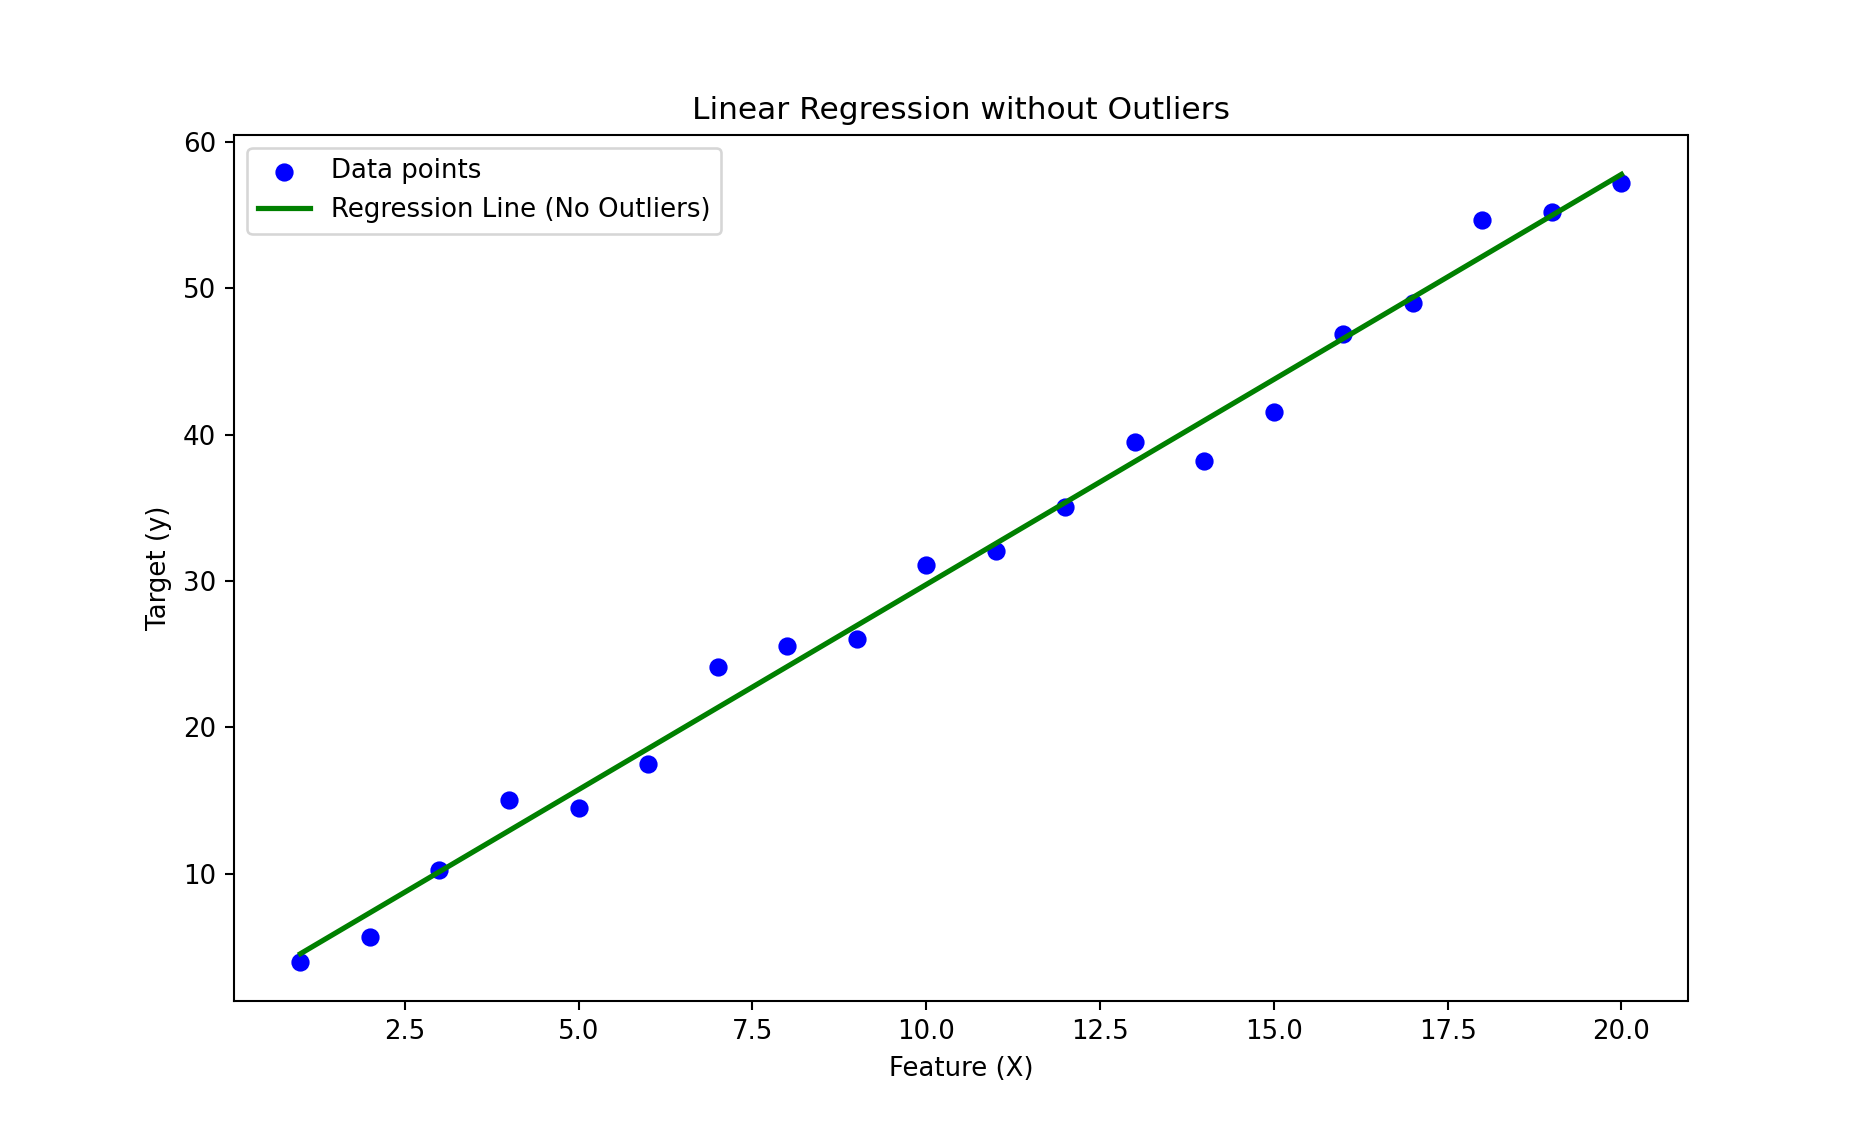

<IPython.core.display.Javascript object>


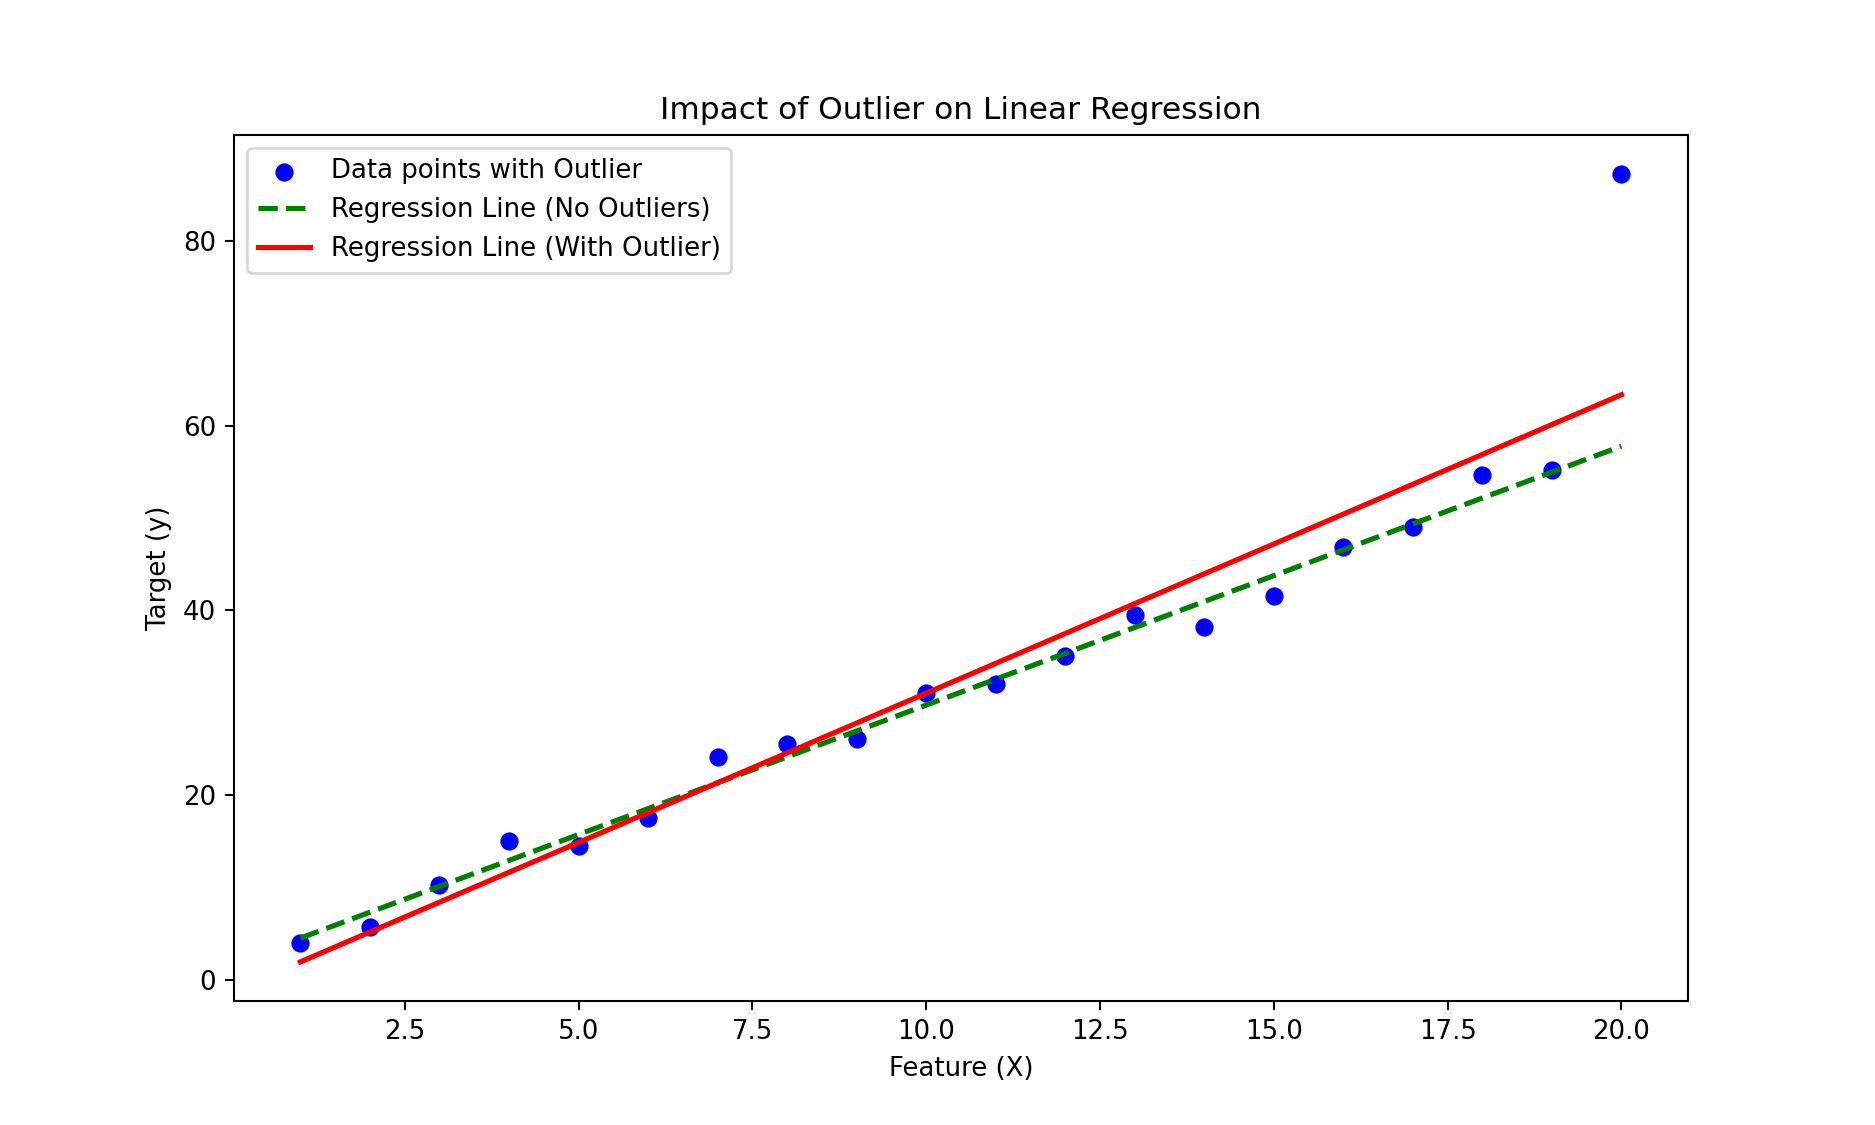

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a clear linear relationship
X = np.arange(1, 21).reshape(-1, 1)  # Feature (1, 2, 3, ..., 20)
y = 3 * X.squeeze() + np.random.normal(0, 2, X.shape[0])  # Linear relationship with some noise

# Fit a linear regression model to the data without outliers
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot the data and the regression line (without outliers)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, y_pred, color='green', linewidth=2, label="Regression Line (No Outliers)")
plt.title("Linear Regression without Outliers")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# Now let's add an outlier and observe its impact
y_with_outlier = y.copy()
y_with_outlier[-1] += 30  # Add an extreme outlier to the last point

# Fit the model again, this time with the outlier
model_with_outlier = LinearRegression()
model_with_outlier.fit(X, y_with_outlier)
y_pred_with_outlier = model_with_outlier.predict(X)

# Plot the data with outlier and new regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y_with_outlier, color='blue', label="Data points with Outlier")
plt.plot(X, y_pred, color='green', linestyle='--', linewidth=2, label="Regression Line (No Outliers)")
plt.plot(X, y_pred_with_outlier, color='red', linewidth=2, label="Regression Line (With Outlier)")
plt.title("Impact of Outlier on Linear Regression")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()


### Examples of outliers

#### Energy Consumption During Holidays:
    
    Scenario: Utilities may use regression to predict daily energy usage. Most days follow predictable patterns, but holidays or extreme weather events might cause spikes.
    
#### Financial Market Data:

    When predicting stock prices, sudden market events like economic crises or company scandals can cause large, unexpected price jumps or drops.
    
    
#### Patient Recovery Times in Healthcare:

    When predicting recovery times, most patients might recover in a predictable range, but a few might have unusually long recoveries due to complications
    
    
### How Outliers Affect the Regression Line

In a simple linear regression, the model tries to minimize the distance (error) between the predicted line and actual data points. Outliers increase this distance, forcing the line to tilt or shift in an attempt to minimize error.

## Let's discuss:

Imagine you’re trying to predict something important, like energy usage in your city. If a rare heatwave suddenly happens, would you keep that day’s data in your model? How might it affect predictions for normal days? What are some other cases where outliers might cause issues in predictions?

### Here’s how an outlier typically impacts the regression line:

    Pulling Effect: An outlier, especially if it’s far from the main cluster of data, can “pull” the line towards itself, resulting in a tilted line that doesn’t represent the rest of the data accurately.
    Increased Error: The model’s error metric (e.g., Mean Squared Error) increases due to the outlier, which can make the model seem less accurate.

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a clear linear relationship
X = np.arange(1, 21).reshape(-1, 1)  # Feature (1, 2, 3, ..., 20)
y = 3 * X.squeeze() + np.random.normal(0, 2, X.shape[0])  # Linear relationship with noise

# Fit initial model without any outliers
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Function to plot with interactive outliers
def plot_with_outliers(num_outliers=1, outlier_intensity=20):
    # Copy the original y values
    y_with_outliers = y.copy()
    
    # Add outliers at random points
    outlier_indices = np.random.choice(range(len(X)), num_outliers, replace=False)
    for index in outlier_indices:
        y_with_outliers[index] += outlier_intensity  # Add intensity to create an outlier
    
    # Fit model with the new outliers
    model_with_outliers = LinearRegression()
    model_with_outliers.fit(X, y_with_outliers)
    y_pred_with_outliers = model_with_outliers.predict(X)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y_with_outliers, color='blue', label="Data points with Outliers")
    plt.plot(X, y_pred, color='green', linestyle='--', linewidth=2, label="Regression Line (No Outliers)")
    plt.plot(X, y_pred_with_outliers, color='red', linewidth=2, label="Regression Line (With Outliers)")
    plt.title(f"Impact of {num_outliers} Outlier(s) on Linear Regression")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.show()

# Interactive widgets for the number and intensity of outliers
num_outliers_slider = widgets.IntSlider(value=1, min=1, max=5, step=1, description="Number of Outliers")
outlier_intensity_slider = widgets.IntSlider(value=20, min=5, max=50, step=5, description="Outlier Intensity")

# Display interactive plot
widgets.interactive(plot_with_outliers, num_outliers=num_outliers_slider, outlier_intensity=outlier_intensity_slider)


interactive(children=(IntSlider(value=1, description='Number of Outliers', max=5, min=1), IntSlider(value=20, …

### How to deal with outliers?

There are three basic approaches:

    Remove Outliers: In cases where outliers are due to data entry errors or extreme events unlikely to reoccur, removing them can improve model accuracy.
    
    Use Robust Regression: Some models, like robust regression, are less sensitive to outliers and minimize their impact on the line of best fi
    
    Transform Data: Applying transformations (e.g., log transformations) can help reduce the effect of outliers by shrinking large deviations.
    
#### Removing outliers?

The typica method to approach that is based on the simple filtration based on the distribution of the data. Remember distributions?

<img src='img/gauss.jpg'/>

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from scipy.stats import gaussian_kde
from IPython.display import display

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a linear trend and add some controlled outliers
X = np.arange(1, 31).reshape(-1, 1)  # Feature (1, 2, 3, ..., 30)
y = 2.5 * X.squeeze() + np.random.normal(0, 3, X.shape[0])  # Linear relationship with noise

# Introduce controlled outliers
y[7] += 25
y[14] -= 20
y[21] += 30

# Function to plot regression with quantile-based outlier filtering and KDE plot
def plot_filtered_regression(quantile_threshold=0.05):
    # Calculate quantile threshold limits for filtering
    lower_limit = np.quantile(y, quantile_threshold)
    upper_limit = np.quantile(y, 1 - quantile_threshold)
    
    # Filter data based on quantile threshold limits
    mask = (y >= lower_limit) & (y <= upper_limit)
    X_filtered = X[mask]
    y_filtered = y[mask]
    
    # Plot KDE and quantile threshold lines
    plt.figure(figsize=(10, 5))
    y_range = np.linspace(min(y) - 5, max(y) + 5, 1000)
    kde = gaussian_kde(y, bw_method='scott')
    kde_values = kde(y_range)
    plt.plot(y_range, kde_values, label="KDE of y", color="blue")
    plt.axvline(x=lower_limit, color="red", linestyle="--", label=f"Lower Threshold (Quantile {quantile_threshold})")
    plt.axvline(x=upper_limit, color="red", linestyle="--", label=f"Upper Threshold (Quantile {1 - quantile_threshold})")
    plt.xlabel("y (Target Values)")
    plt.ylabel("Density")
    plt.title("KDE Plot of y with Quantile Thresholds")
    plt.legend()
    plt.show()
    
    # Check if there are enough points left after filtering
    if len(X_filtered) > 1:
        # Fit regression models for comparison
        model_original = LinearRegression().fit(X, y)
        y_pred_original = model_original.predict(X)
        
        model_filtered = LinearRegression().fit(X_filtered, y_filtered)
        y_pred_filtered = model_filtered.predict(X_filtered)
        
        # Plot the original and filtered regression lines
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color="blue", label="Original Data with Outliers")
        plt.scatter(X_filtered, y_filtered, color="orange", label="Filtered Data (No Outliers)")
        plt.plot(X, y_pred_original, color="red", linestyle="--", linewidth=2, label="Regression Line (Original)")
        plt.plot(X_filtered, y_pred_filtered, color="green", linewidth=2, label="Regression Line (Filtered)")
        plt.xlabel("Feature (X)")
        plt.ylabel("Target (y)")
        plt.title("Outlier Removal using Quantile-based Filtering")
        plt.legend()
        plt.show()
    else:
        # Message if no data points are left after filtering
        print("No data points left after filtering. Adjust the threshold.")

# Interactive widget for setting quantile threshold
quantile_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description="Quantile Threshold")

# Display the interactive plot
display(widgets.interactive(plot_filtered_regression, quantile_threshold=quantile_slider))


interactive(children=(FloatSlider(value=0.05, description='Quantile Threshold', max=0.2, min=0.01, step=0.01),…

### Use robust regression

There are more advanced regression models we can use to fit regression line.

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import ipywidgets as widgets
from IPython.display import display

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with a clear linear trend and a few outliers
X = np.arange(1, 31).reshape(-1, 1)  # Feature (1, 2, 3, ..., 30)
y = 2.5 * X.squeeze() + np.random.normal(0, 3, X.shape[0])  # Linear relationship with noise

# Introduce controlled outliers
y[7] += 25
y[1] -= 25
y[14] -= 30
y[21] += 50
y[24] += 50

# Dictionary of available regression models with regularization
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression (L2)": Ridge(alpha=14.0),
    "Lasso Regression (L1)": Lasso(alpha=14.0),
    "Elastic Net": ElasticNet(alpha=14.0, l1_ratio=0.5)
}

# Function to fit and visualize different regularization models
def plot_regularization(model_name="Linear Regression"):
    # Get the selected model from the dictionary
    model = models[model_name]
    
    # Fit the model to the data
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Fit the standard Linear Regression model for comparison
    linear_model = LinearRegression().fit(X, y)
    y_pred_linear = linear_model.predict(X)
    
    # Plotting the data and the regression lines
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, color="blue", label="Original Data with Outliers")
    plt.plot(X, y_pred_linear, color="red", linestyle="--", linewidth=2, label="Standard Linear Regression")
    plt.plot(X, y_pred, color="green", linewidth=2, label=f"{model_name}")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.title(f"Comparison of {model_name} with Standard Linear Regression")
    plt.legend()
    plt.show()

# Interactive widget for selecting regularization model
model_selector = widgets.Dropdown(
    options=["Linear Regression", "Ridge Regression (L2)", "Lasso Regression (L1)", "Elastic Net"],
    value="Linear Regression",
    description="Select Model:"
)

# Display the interactive plot
display(widgets.interactive(plot_regularization, model_name=model_selector))

interactive(children=(Dropdown(description='Select Model:', options=('Linear Regression', 'Ridge Regression (L…

 In traditional linear regression, the model minimizes the sum of squared residuals (the differences between predicted and actual values). This approach works well for data without extreme outliers but can be easily distorted by a few unusual data points, as these outliers exert a large influence on the model's predictions.
 
Some methods are designed to overcome this problem

### Regularization

Regularization is a technique used in regression to improve model robustness and prevent overfitting. While it doesn't specifically target outliers, it is highly effective when there are many features or when the model is overfitting. Regularization penalizes large model coefficients, effectively “shrinking” them and thereby reducing the model’s sensitivity to individual data points, which can include outliers.

The concept of regularization will become handy when we start to work with

## Advanced regression model - polynomial regression

While linear regression is simple and powerful, real-world data is often too complex for a straight-line fit. Fortunately, there are more advanced regression models that can capture complex patterns in data. These models allow us to account for non-linear relationships, interactions between features, and even adapt when our data contains outliers.

Here, we’ll explore three examples of more complex regression techniques that go beyond linear regression: 

    Polynomial Regression, 
    Decision Tree Regression, 
    and Support Vector Regression (SVR)

### Polynomial regression

*What It Is*: Polynomial regression extends linear regression by adding combinations of the original features. For example, instead of just fitting a line, it might fit a curve by adding squared terms (e.g., X2X2) or even higher powers.

*How It Works*: In polynomial regression, we create new “features” by raising the original feature values to higher powers. These new features allow the model to bend and fit data that follows a non-linear trend.

*Example*: Imagine predicting the height of a plant over time. Initially, growth might be slow, then accelerate, and eventually level off. Linear regression might not fit this data well, but polynomial regression can create a curve that better matches the plant’s growth pattern.

Mean Squared Error (MSE): 0.309
R² Score: 0.285


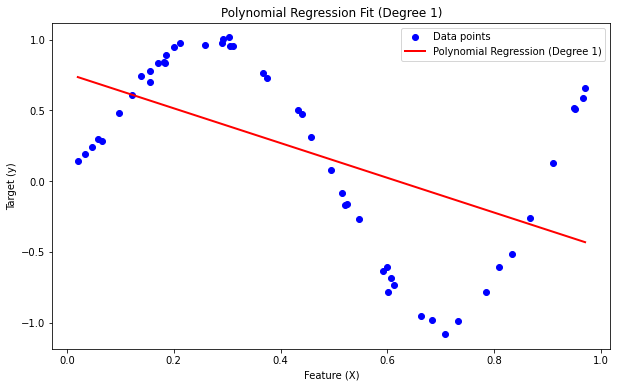

In [111]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.sort(np.random.rand(50, 1) * 1, axis=0)  # Feature values between 0 and 10
y = np.sin(5.3 * X.squeeze() + 1.95 * X.squeeze() ** 2) + np.random.normal(0, 0.04, X.shape[0])  # Quadratic relationship with noise


# Polynomial transformation
degree = 1  # Degree of the polynomial (e.g., quadratic)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit linear regression on the transformed polynomial features
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# Visualize the polynomial regression fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, y_pred, color='red', linewidth=2, label=f"Polynomial Regression (Degree {degree})")
plt.title(f"Polynomial Regression Fit (Degree {degree})")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()


<IPython.core.display.Javascript object>


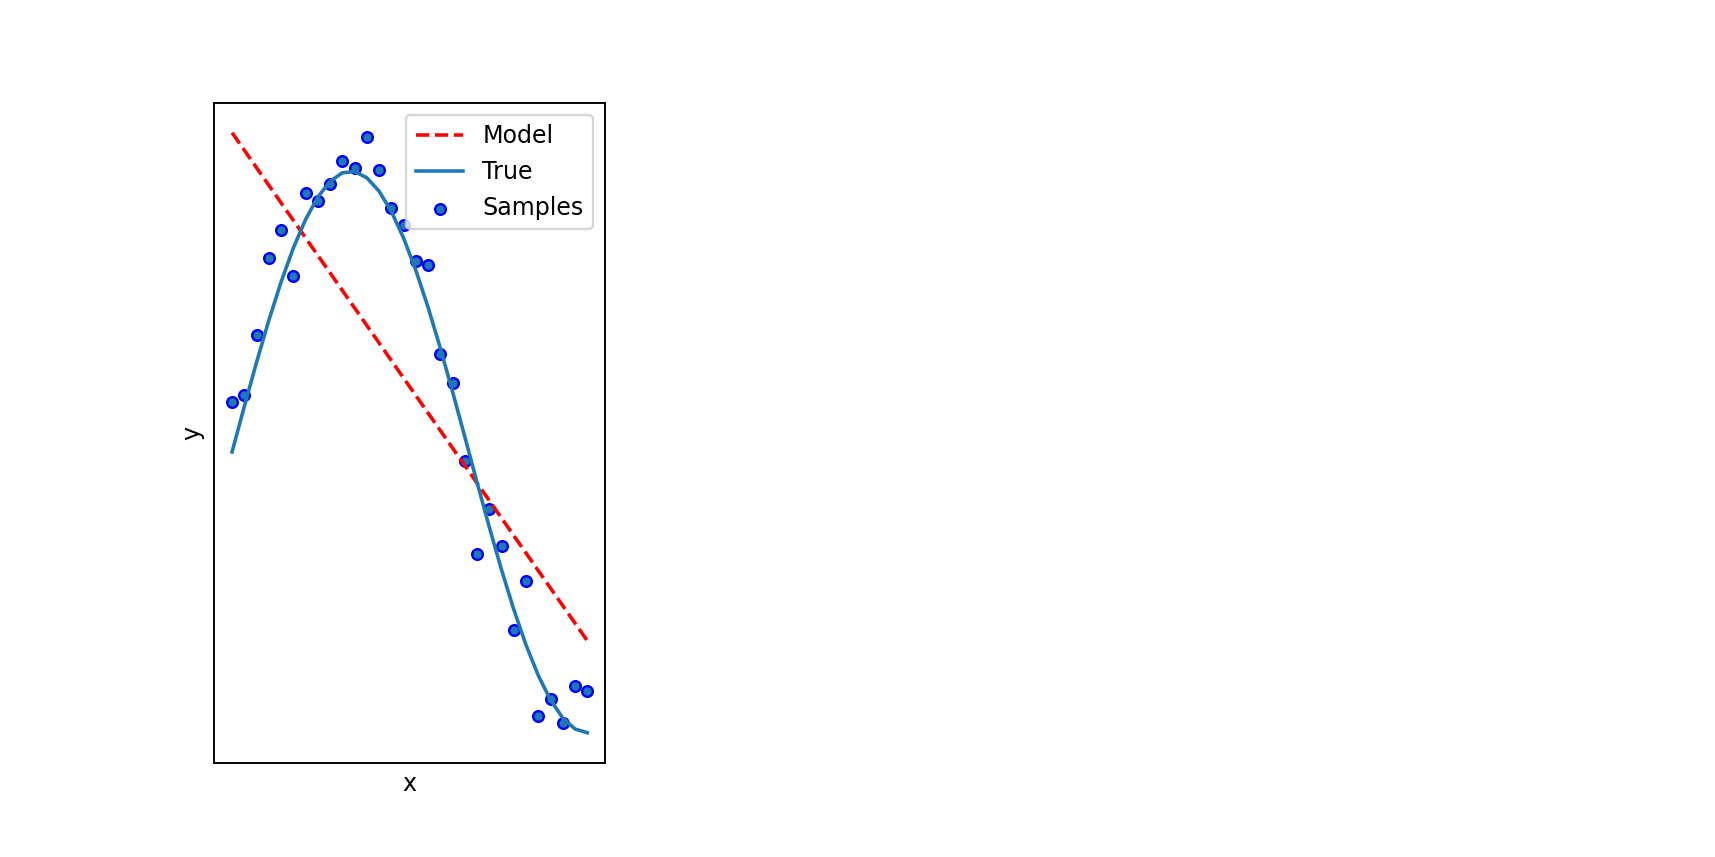

NameError: name 'sumv2' is not defined

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(0)

degrees = [1, 5, 30]

X = np.linspace(0,1,30).reshape(-1,1)
y = true(X) + np.random.randn(30).reshape(-1,1) * 0.1


plt.figure(figsize=(10,5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    poly = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    reg = LinearRegression()
    poly_features = poly.fit_transform(X)
    reg.fit(poly_features,y)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X, reg.predict(poly_features), label="Model", ls='--', c = 'r')
    plt.plot(X, true(X), label="True")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Sum of errors:"+str(sumv2(reg.predict(poly_features),y)))
plt.show()

### Overfitting and Underfitting in Regression

#### Underfitting

Underfitting occurs when a model is too simple to capture the patterns in the data. This usually happens when we use a model that doesn’t have enough flexibility or complexity, such as a linear model for data with a non-linear trend.

#### Overfitting

Overfitting happens when a model is too complex, capturing noise along with the actual patterns in the data. This often occurs with high-degree polynomial models or very flexible algorithms when applied to limited data.


#### Finding the Right Balance

The goal is to find a model that’s complex enough to capture the relationships in the data but not so complex that it overfits.

#### Any ideas on how to find the correct model? Have we already covered something which might help with that problem?

In [113]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.sort(np.random.rand(30, 1) * 10, axis=0)  # Feature values between 0 and 10
y = 3 - 0.5 * X.squeeze() + 0.05 * X.squeeze() ** 2 + np.random.normal(0, 0.5, X.shape[0])  # Quadratic relationship with noise

# Generate test data to evaluate generalization
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_test = 3 - 0.5 * X_test.squeeze() + 0.05 * X_test.squeeze() ** 2  # True underlying function (without noise)

# Function to plot polynomial regression and visualize overfitting and underfitting
def plot_overfitting_underfitting(degree=1):
    # Polynomial transformation
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    X_test_poly = poly_features.transform(X_test)
    
    # Fit linear regression on the transformed polynomial features
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred_train = model.predict(X_poly)
    y_pred_test = model.predict(X_test_poly)
    
    # Calculate performance metrics
    train_mse = mean_squared_error(y, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Plotting the data and polynomial regression fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label="Training Data")
    plt.plot(X_test, y_test, color="black", linestyle="--", label="True Function")
    plt.plot(X_test, y_pred_test, color='red', linewidth=2, label=f"Polynomial Regression (Degree {degree})")
    plt.title(f"Polynomial Regression with Degree {degree}")
    plt.xlabel("Feature (X)")
    plt.ylabel("Target (y)")
    plt.legend()
    plt.show()
    
    # Display metrics
    print(f"Degree: {degree}")
    print(f"Training MSE: {train_mse:.3f}")
    print(f"Test MSE: {test_mse:.3f}")
    print(f"Training R² Score: {train_r2:.3f}")
    print(f"Test R² Score: {test_r2:.3f}")

# Interactive slider for adjusting polynomial degree
degree_slider = widgets.IntSlider(value=1, min=1, max=15, step=1, description="Degree")

# Display the interactive plot
display(widgets.interactive(plot_overfitting_underfitting, degree=degree_slider))


interactive(children=(IntSlider(value=1, description='Degree', max=15, min=1), Output()), _dom_classes=('widge…

### Wrap-up quiz
    
 Why might we sometimes prefer a simpler model, even if it’s less accurate?
    
 In which scenario might you use Lasso or Ridge regularization? Can you think of real-life examples where each might be useful?
    
 Can anyone think of a real-world example where underfitting or overfitting could occur? Perhaps in predicting house prices, weather, or even something like social media trends?
    